# 1. Introduction
Machine Learning is the study of computer algorithms that improve automatically through experience. Machine Learning algorithms build a mathematical model based on sample data in order to make predictions or decisions. In Data Analytics, Machine Learning is referred to as *predictive analysis* (supervised learning) and *data mining* (unsupervised learning).

*Reference: [Wikipedia - Machine Learning](https://en.wikipedia.org/wiki/Machine_learning)*

#### Supervised Machine Learning
Refers to algorthims that learn a general *rule* from labeled data, then use that *rule* to predict labels for new, unlabeled data. The *rule* in this context can be understood as a function mapping input (features) to output (label). Supervised learning is all about predicting labels, it contains two areas of problems:
- Classification
- Regression

#### Unsupervised Machine Learning
Unlike supervised learning, unsupervised algorithms do not require known lables, they find hidden data patterns on their own. However, unsupervised learning is less popular and harder to evaluate the performance, compare to supervised learning. Here are some important applications of unsupervised learning:
- Clustering
- Dimensionality reduction
- Recommendation system

#### Machine Learning and Statistics
This section discusses the replationship between Machine Learning, Statistics and Statistical Modelling, since these concepts are very close to each other.

Statistics is one of the three mathematical foundations of Machine Learning (the two others are Linear Algebra and Calculus). Some notable concepts in Statistics that have been applied in Machine Learning algorithms are normal distribution, logistic distribution, central limit theorem and Bayes theorem.

Like Machine Learning, Statistical Modelling is also built upon Statistics. The major difference are their purpose: Machine Learning is designed to make the most accurate predictions possible, while Statistical Modelling is designed for inference about the relationships between variables.

#### Building an algorithm
Every supervised Machine Learning algorithm can be summarized into a map $f$ that maps input variables $\mathbf{X}$ into output variable $\mathbf{y}$:

$$f:\mathbf{X}\mapsto\mathbf{y}$$

Depend on the form of $f$, a Machine Learning algorithm can be either *parametric* or *non-parametric*.
- *Parametric* algorithms learn a set of function parameters that minimizes a *loss* quantity. The function used in *parametric* algorithms must be pre-defined, thus the number of its parameters is fixed regardless of the number of observations.
- *Non-parametric* algorithms learn a set of logical if-else statements. The model size has no limitation, it grows as the number of observation increases. However, some *stopping criateria* can be set to prevent the model to be too complex.

Some pros and cons of the two approaches:
- Non-parametric algorithms are more complex, since parametric algorithms constrain to the form of the functions.
- As a consequence of the complexity, non-parametric algorithms have more predictive power, while parametric methods seem unlikely to match the underlying rule.
- Non-parametric algorithms contains a lot of information, thus they are slower when fitting to the data.

# 2. Terminology
This section focus on concepts that occur in supervised Machine Learning.

## 2.1. Training
Training is the process of generating a particular model from an algorithm.

#### Model
A model is the output of a Machine Learning algorithm ran on the data. For example, the Linear Regression algorithm results in a model being a vector of parameters (also known as weights). Machine Learning uses mathematical techniques to estimate those parameters.

After the parameters have been calculated, the model is saved as a file and can be used on the data it hasn't seen before to make predictions.

#### Loss function
Loss function is a function that maps a model to its associated cost. In Machine Learning, loss functions usually evaluate the error, for example the difference between real values and predicted values. Each algorithm tries to minimize its own loss function to estimate the parameters.

#### Gradient descent
In multivariate calculus, the gradient of a multivariable function $f(x,y,z,\dots)$, denoted $\nabla{f}$ is a vector that stores all partial derivatives.

$$\nabla{f} =
\begin{bmatrix}
\frac{\partial{f}}{\partial{x}} &
\frac{\partial{f}}{\partial{y}} &
\frac{\partial{f}}{\partial{z}} &
\cdots &
\end{bmatrix}^T$$

At every local minimum or local maximum of the function $f(x,y,z,\dots)$, the gradient $\nabla{f}$ is $\mathbf{0}$. By solving the linear system, those extreme points can be found. Then compare the extrema to find the minimum and maximum. The steps above show how to use gradient to find the minimum of a loss function and the associated values of parameters. However, for very large linear systems, solving them directly seems impossible.

Therefore, an iterative method called gradient descent is commonly used as the optimization algorithm in Machine Learning. The algorithm begins at a point (initial value), moves in the opposite direction of the gradient and stops when $\|\nabla{f}\|_2 \approx 0$.

Gradient descent has a parameter, $\eta$ - the learning rate, represents how fast the algorithm goes down. A high learning rate means less iterations to perform, but we risk bypassing the lowest point. A low learning rate makes sure we can always reach the bottom, but it can take a very long time.

## 2.2. Validating
Validating is the process of finding optimal hyperparameters. Also called hyperparameters tuning.

#### Hyperparameters
A hyperparameter is a configuration which is external to the model. Hyperparameters cannot be estimated since they need to be set before fitting the algorithm. They are optimized using rules of thumb or trial and error.

#### Metrics
Metrics are the formulas that evaluate the performance of Machine Learning models. The metrics are selected depend on the type of algorithm, which can be either regression, classification or clustering. Also notice that multiple metrics can be used on a single model; and the loss function can also be used as a metric.

#### Validation
The final purpose of a Machine Learning model is to work well on completely new data. To achieve this, we perform validation:
- Step 1: Randomly split the data into 3 sets: training set, validation set and test set. The ratio is usually 70:15:15 or 80:10:10.
- Step 2: Fit the algorithm on the training data. Then use the output model to predict label for the validation set and evaluate the performance.
- Step 3: Repeat step 2 with different values of hyperparameters to find the model with best performance.
- Step 4: Apply the model to the test data and calculate metrics.

#### Cross validation
Considering validation, when the data is not large enough, the training set and the test set may not distribute the same way, which leads to bias. A technique called cross validation my be used to handle the situation.
- Step 1: Randomly devide the entire dataset into $k$ equal folds ($k$ is usually from 5 to 10).
- Step 2: Run a loop through each of the $k$ folds. In each iteration:
    - Take the selected fold as the test set and take the $k-1$ remaining folds to form the training set
    - Fit the algorithm on the training set and evaluate it on the test set
    - Retain the metric and discard the model
- Step 3: Fit the algorithm on the entire data to get the final model. Then calculate the average of the recorded scores as the overall performance metric for the model. The standard deviation of the scores should not be too high.

<img src='image/cross_validation.png' style='height:300px; margin: 0 auto 20px;'>

## 2.3. Testing

#### Goodness of fit
Generalization is the ability of a model to give sensible output when given the data is has never seen before. A model generalizes well if it is neither *underfitting* nor *overfitting*.

<img src='image/goodness_of_fit.png' style='height:300px; margin: 0 auto 20px;'>

*Overfitting* refers to the situation that the performance of a model is very good on the training set but drops significantly over the test set. This can be explained that the model has learned the noises and random fluctuations from the training data, which do not occur on new data. *Early stopping* and *regularization* are two popular techniques to reduce overfitting.

*Underfitting* can be regconized when the model performs poorly on both the test and the training set. The reason behind this is the model is not complex enough to capture patterns from the training data, so obviously there is no way it can work well on new data. The only thing can be done to prevent underfitting is increase the complexity of the model.

# 3. Evaluation
*Reference: [Scikit-Learn - Metrics](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)*

## 3.1. Classification visualization
This section visualizes the performance for binary classification problems.

In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

In [2]:
df = pd.read_excel('data\credit_scoring.xlsx')
df = df.fillna(0)
X = df.drop(columns='bad_customer').values
y = df.bad_customer.values

In [4]:
algo = DecisionTreeClassifier(max_depth=15)
model = algo.fit(X, y)
y_true = y
y_prob = model.predict_proba(X)[:, 1]
y_pred = model.predict(X)

#### Confusion matrix
Confusion matrix is a visualization for the performance of classification algorithms. Each column represents the number of observations in an actual class and each row represents the number of observations in a predicted class.

<img src='image/confusion_matrix_binary.png' style='height:300px; margin: 0 auto 20px;'>

However, in real-world problems, sometimes a class is more important than the others. From the perspective of that class, "Orange" for example, an observation may have the following statuses:
- Positive if the predicted class is orange, Negative if the predicted class is not orange
- True if the predicted class is correct, False if the predicted class is incorrect

The combination of the statuses above returns 4 quatities: TP (True Positive), TN (True Negative), FP (False Positive) and FN (False Negative), which are used to calculate metrics for classification algorithms. These terms are arranged in a single table:

<img src='image/confusion_matrix.png' style='height:300px; margin: 0 auto;'>

#### Precision-Recall Chart
PR Chart plots the values of Precision and Recall at different thresholds. Looking at this graph allows Data Scientists to understand deeply about the trade-off between Precision and Recall and can select an optimal threshold.

In [28]:
def plotPRChart(y_true, y_prob):

    df_prob = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob})
    
    thresholds = np.arange(0, 1, 0.01)
    precisions = []
    recalls = []
    for threshold in thresholds:
        def predict(y_prob):
            if y_prob > threshold: y_pred = 1
            else: y_pred = 0
            return y_pred
        
        df_pred = df_prob.assign(y_pred=df_prob.y_prob.map(predict))
        
        TP = df_pred[(df_pred.y_true==1) & (df_pred.y_pred==1)].shape[0]
        FN = df_pred[(df_pred.y_true==1) & (df_pred.y_pred==0)].shape[0]
        FP = df_pred[(df_pred.y_true==0) & (df_pred.y_pred==1)].shape[0]
        TN = df_pred[(df_pred.y_true==0) & (df_pred.y_pred==0)].shape[0]
        
        precision = TP/(TP + FP + 1e-6)
        recall = TP/(TP + FN + 1e-6)
            
        precisions.append(precision)
        recalls.append(recall)

    fig, ax = plt.subplots()
    ax.plot(thresholds, precisions)
    ax.plot(thresholds, recalls)
    ax.set_xlabel('Threshold')
    ax.legend(['Precision', 'Recall'], loc='best')
    ax.axis('scaled')
    plt.show()

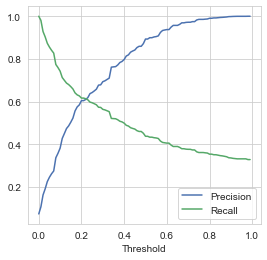

In [29]:
plotPRChart(y_true, y_prob)

#### ROC Curve
The ROC (Receiver Operating Characteristics) curve is plotted with TPR (True Positive Rate) against FPR (False Positive Rate) at different decision thresholds. It gives an overview about how well the model distinguish between the two classes.

$$\mathrm{TPR}=\mathrm{Recall}=\mathrm{Sensitivity} = 
\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}$$

$$\mathrm{FPR}=1-\mathrm{Specificity} = 
\frac{\mathrm{FP}}{\mathrm{TN}+\mathrm{FP}}$$

In real world problems, there is always a trade-off between high Sensitivity and high Specificity. By looking at the ROC curve, there are many insights can be read from it:
- Comaparing the quality of different models. The more convex the curve is, the more predictive power it has.
- Determining the optimal threshold.
- Calculating the AUROC (Area Under the ROC), which is a single value summarizes the overall performance of the model.

In [36]:
def plotROC(y_true, y_prob):

    df_prob = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob})
    
    thresholds = np.arange(0, 1, 0.01)
    sensitivities = [1]
    specificities = [0]
    for threshold in thresholds:
        def predict(y_prob):
            if y_prob > threshold: y_pred = 1
            else: y_pred = 0
            return y_pred
        
        df_pred = df_prob.assign(y_pred=df_prob.y_prob.map(predict))
        
        TP = df_pred[(df_pred.y_true==1) & (df_pred.y_pred==1)].shape[0]
        FN = df_pred[(df_pred.y_true==1) & (df_pred.y_pred==0)].shape[0]
        FP = df_pred[(df_pred.y_true==0) & (df_pred.y_pred==1)].shape[0]
        TN = df_pred[(df_pred.y_true==0) & (df_pred.y_pred==0)].shape[0]
    
        sensitivity = TP/(TP + FN + 1e-6)
        specificity = TN/(TN + FP + 1e-6)
            
        sensitivities.append(sensitivity)
        specificities.append(specificity)
    
    sensitivities.append(0)
    specificities.append(1)

    fig, ax = plt.subplots()
    ax.plot([1, 0], [0, 1], color='k', linestyle='--')
    ax.plot(specificities, sensitivities)
    ax.set_xlabel('Specificity')
    ax.set_ylabel('Sensitivity')
    ax.axis('scaled')
    plt.show()

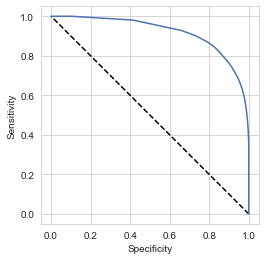

In [37]:
plotROC(y_true, y_prob)

#### Cumulative Gains
In many business problems, resources are limited, thus only the most potential targets are visited. So it is really important for the model to cover a high ratio of positive instances only by visiting a small part of the dataset, and this is where Cumulative Gains is used.

Cumulative Gains shows the overall positive percentage *gained* by targeting a top fraction of all observations. A popular method determining the fractions of observations is *deciles* (10-quantiles). The diagonal in the chart represents the *baseline* model, which targets observations at random. A good model should have a high gain value at the very first decile.

In [5]:
def plotCumulativeGains(y_true, y_prob):
    
    df_prob = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob}).sort_values('y_prob', ascending=False)
    n = df_prob.shape[0]
    n_positive = df_prob[df_prob.y_true == 1].shape[0]
    
    deciles = np.linspace(0, 1, 11)
    gains = []
    
    for decile in deciles:
        n_visit = int(n * decile)
        df_gain = df_prob.head(n_visit)
        n_gain_positive = df_gain[df_gain.y_true == 1].shape[0]
        gain = n_gain_positive / n_positive
        gains.append(gain)
    
    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], color='k', linestyle='--')
    ax.plot(deciles, gains, marker='o')
    ax.legend(['Baseline', 'Gains'], loc='best')
    ax.set_xlabel('Deciles')
    ax.set_ylabel('Gains')
    ax.axis('scaled')
    plt.show()

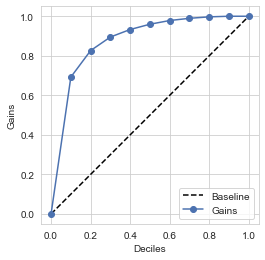

In [6]:
plotCumulativeGains(y_true, y_prob)

#### Lift Curve
Besides Cumulative Gains, Lift Curve is also a powerful tool being widely used in marketing campaigns. It helps analyzing the overall positive percentage in each bin, comparing to bin size. Notice that bin size represents the expected percent of positive instances if targeting randomly. For example, assume there are total of 70 positive instances and the bin size is choosen of 10% (*deciles*), then each bin is expected to contains $70\cdot 10\%=7$ positive instances.

The Lift Curve for an ideal model should have very high values at first, then drop significantly to the point that lift values are below the *baseline*. This proves the vast majority of positive instances are in first bins.

In [81]:
def plotLiftCurve(y_true, y_prob):
    
    bin_size = 0.01
    df_prob = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob}).sort_values('y_prob', ascending=False)
    n = df_prob.shape[0]
    n_visit = int(n * bin_size)
    n_positive = df_prob[df_prob.y_true == 1].shape[0]
    
    deciles = np.arange(1, 0, - bin_size)[::-1]
    lifts = []
    
    for decile in deciles:
        n_top = int(n * decile)
        df_gain = df_prob.head(n_top).tail(n_visit)
        n_gain_positive = df_gain[df_gain.y_true == 1].shape[0]
        lift = n_gain_positive / n_positive / bin_size
        lifts.append(lift)
    
    fig, ax = plt.subplots()
    ax.plot([0, 1], [1, 1], color='k', linestyle='--')
    ax.plot(deciles, lifts)
    ax.set_xlabel('Deciles')
    ax.set_ylabel('Lift')
#     ax.axis('scaled')
    plt.show()

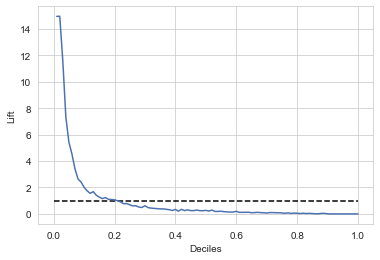

In [82]:
plotLiftCurve(y_true, y_prob)

## 3.2. Classification metrics

#### Accuracy
Accuracy treats all the classes equally, since it calculates the True rate, which is the number of correct predictions over the total of predictions made. Accuracy is the default classification metric used in `sklearn`.

$$\mathrm{Accuracy} = \frac{\mathrm{T}}{\mathrm{T}+\mathrm{F}}$$

Accuracy is a very good measure when the classes are (nearly) balanced, however it should never be used when the majority of the data fall into a single class. For example, there are 5 people have cancer out of 100 observations, and a predictive model classifies all 100 people have no cancer. So even it is very terrible at predicting cancer, such a bad model still has the Accuracy of 95%.

#### Precision
The Precision of a class shares the same meaning with Accuracy, but it considers only Positive predictions. It is calculated as the proportion of those Positive predictions are actually Positive.

$$\mathrm{Precision} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FP}}$$

Precision should be used when you want to make classification for one class as good as possible. For example, a video recommendation system classifies Positive for revalent videos and Negative for non-revalent ones. The recommended videos should be revalent to the users, so the system should have a high Precision.

#### Recall
The per-class Recall, also know as Sensitivity, measures the proportion of actual Positive observations are correctly classified.

$$\mathrm{Recall} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}$$

If you don't want to mispredict any real Positive case, then you need Recall. For example, a COVID-19 test kit must detect as many infected people (Positive) as possible, so it should have a high Recall.

#### F-score
Machine Learning is full of trade-offs, oftentimes your classifier does not have good Precision and good Recall at the same time. A single metric that summarizes both is needed, and that's where F-score is used.

$$
F_1 = \left(\frac{1}{2}\cdot\mathrm{Precision}^{-1}+\frac{1}{2}\cdot\mathrm{Recall}^{-1}\right)^{-1}
$$

To compute $F_1$ score, the harmonic mean is used instead of the usual arithmetic mean since this method gives a higher weight to the lower quantity of the two. For example, a classifier has a Precision of 10% and a Recall of 90%, then their harmonic mean is 18% while their arithmetic mean is 50%. So, a high $F_1$ score ensures that the Precision and Recall are both high.

However, there is a disadvantage of $F_1$ score is that it treats both Precision and Recall equally. Sometimes it is required to include domain knowledge in the model, specificly more Recall or more Precision. To solve this, we add a weight to Precision, denoted $\beta$, to control the trade-off between Precision and Recall. $\beta$ implies how many times is Recall more important than Precision.

$$
F_{\beta} = \left(\frac{1}{1+\beta^2}\cdot\mathrm{Precision}^{-1} + \frac{\beta^2}{1+\beta^2}\cdot\mathrm{Recall}^{-1}\right)^{-1}
$$

#### AUROC
AUROC stands for Area Under the ROC curve, the name shows how it is calculated. The value of AUROC is in the range $[0,1]$, where higher value means better ability in distinguish the two classes. AUROC is a well-rounded metric and is widely used in real world classification problems.

#### Multi-class metrics
Notice that except for Accuracy, all the above metrics are defined for binary classification. In multi-class problems, they can only measure the performance on a class versus the rest. Here is how the overall metric of the model is calculated, let's take Precision as an example:
- Micro Precision, by taking the avarage TP and FP for each class, then apply the same per-class formula.

$$\mathrm{MicroPrecision}=\frac{\sum{\mathrm{TP}_i}}{\sum{\mathrm{TP}_i}+\sum{\mathrm{FN}_i}}$$

- Macro Precision, by taking the arithmetic mean of Precision of all classes ($n$ is the number of classes).

$$\mathrm{MacroPrecision}=\frac{1}{n}\sum{\mathrm{Precision}_i}$$

- Weighted Precision, by taking the weighted sum of Precision of all classes. The weight $w_i$ is defined as the proportion of size of each class.

$$\mathrm{WeightedPrecision}=\sum{w_i\cdot\mathrm{Precision}_i}$$

The `sklearn` library provides the `classification_report` function that calculates both per-class metrics and overall metrics.

#### Use a custom metric for validation
The default metric used in `sklearn` is Accuracy, however you can use another one using the `scoring` parameter. It takes a string as input, where available options can be found in the reference. For a complex metric, the function requires to define it first.

*Reference: [Scikit-Learn - Defining model evaluation rules](https://scikit-learn.org/stable/modules/model_evaluation.html?fbclid=IwAR1sIqgakJmfoA51DXOTMcPAxTujWvuJbwfal3yoV8wFI6WWuJHr7tKzKUg#scoring-parameter)*

In [7]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier()
params_grid = {'n_neighbors': [3, 4, 5]}
metric = make_scorer(fbeta_score, beta=4)

In [ ]:
cv = GridSearch(clf, params_grid, scoring='precision')
cv = GridSearch(clf, params_grid, scoring=metric)

## 3.3. Regression metrics
Let $\mathbf{y}=(y_1,y_2,\dots)$ is the vector of true data labels and $\hat{\mathbf{y}}=(\hat{y}_1,\hat{y}_2,\dots)$ is the vector of predicted values.

#### Coefficient of Determination
Coefficient of Determination, denoted $R^2$ $(R^2 \leq 1)$, evaluates the scatter of data point around the fitted regression function. It is calculated using $\mbox{SSE}$ (sum of squared errors) and $\mbox{SST}$ (total sum of squares).

$$R^2
=1-\dfrac{\mbox{SSE}}{\mbox{SST}}
=1-\dfrac{\sum(y_i-\hat{y}_i)^2}{\sum(y_i-\bar{y})^2}$$

#### Mean Absolute Error
MAE is simply the average distance between the real and the predicted values. The absolute value is taken to ensure they do not cancel each other out. MAE does not fall into any certain range, it itself cannot tell if the model is good enough, you can only use MAE to compare the performance of different models.

$${\mbox{MAPE}}={\frac{1}{n}}\sum|y_i-\hat{y}_i|$$

#### Mean Squared Error
MSE is quite similar to MAE, however MSE gives higher penalization to big error. In real world problems, RMSE (Root Mean Squared Error) is used more commonly since it brings MSE back to the same unit with MAE.

$$\mbox{MSE} = \mbox{RMSE}^2 = {\frac{1}{n}} \sum(y_i-\hat{y}_i)^{2}$$

## 3.4. Clustering metrics
*Reference: [Scikit-Learn - Clustering evaluation performance](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)*

Notation:
- $\mathbf{p}_i$ (for $i=1,2,\dots,n$) is a data point
- $C_i$ (for $i=1,2,\dots,k$) is a cluster
- $|C_i|$ (for $i=1,2,\dots,k$) is the size of cluster $C_i$
- $\mathbf{c}_i$ (for $i=1,2,\dots,k$) is the centroid of the cluster $C_i$

#### Silhouette Coefficient
- For each data point $\mathbf{p}_i$, assume it belongs to the cluster $C_i$ and calculate its Silhouette value, $s_i$.
 - Compute $\displaystyle{d_{ii}=\frac{1}{|C_i|-1}\sum_{\mathbf{p}\in C_i}{d(\mathbf{p}_i,\mathbf{p})}}$, the avarage distance between $\mathbf{p}_i$ and all other data points in $C_i$.
 - Compute $\displaystyle{d_{ij}=\min_{j}{\frac{1}{|C_j|}\sum_{\mathbf{p}\in C_j}{d(\mathbf{p}_i,\mathbf{p})}}}$, the average distance between $\mathbf{p}_i$ and all points in the nearest cluster, $C_j $.
 - Compute the Silhouette value for $\mathbf{p}_i$: $\displaystyle{s_i=\frac{d_{ij}-d_{ii}}{\max{\{d_{ii},d_{ij}\}}}}$. This formula ensures $-1\leq s_i\leq 1$, a $s_i$ close to 1 means that the data is appropriately clustered.
- Calculate the Silhouette Coefficient for the entire data set:
$$\mathrm{SC}=\frac{1}{n}\sum_{i=1}^{n}{s_i}$$

#### Calinski-Harabasz Index
Calinski-Harabasz Index is calculated using the following formula:

$$\mathrm{CHI}=\frac{\mbox{SS}_B}{\mbox{SS}_W}\cdot\frac{n-k}{k-1}$$

where:
- $\displaystyle{\mbox{SS}_B=\sum_{i=1}^n n\parallel\mathbf{c}_i-\bar{\mathbf{p}}\parallel_2^2}$ is the overall between-cluster variance

- $\displaystyle{\mbox{SS}_W=\sum_{i=1}^{k}\sum_{\mathbf{p}\in C_i}\parallel\mathbf{p}-\mathbf{c}_i\parallel_2^2}$ is the overall within-cluster variance

#### Davies-Bouldin Index
The calculation of Davies-Bouldin Index follows these steps:

- Step 1: For each cluster $C_i$, calculate the goodness score $D_i$.
 - Compute the measure of scatter $s_i$ for cluster $C_i$ by taking the average Euclidean distance from each point of $C_i$ to the centroid $\mathbf{c}_i$. A small $s_i$ means data points in $C_i$ are close to the centroid.
 - For every cluster $C_j$ other than $C_i$, compute the Euclidean distance $d_{ij}$ between the centroids, $\mathbf{c}_i$ and $\mathbf{c}_j$. A great $d_{ij}$ means the two clusters are well separated.
 - Construct $\displaystyle{R_{ij}=\frac{s_i+s_j}{d_{ij}}}$ which measures the goodness of the clustering model. $R_{ij}$ should be as small as possible.
 - Select $\displaystyle{D_i=\max_{j}{R_{ij}}}$ being the worst case of $R_{ij}$.
- Step 2: Calculate the Davies-Bouldin Index:
$$\mathrm{DBI}=\frac{1}{k}\sum_{i=1}^{k}{D_i}$$

#### Implementation

In [9]:
import numpy as np
import pandas as pd
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()
X = iris.data
label = iris.target

In [13]:
silhouette_score(X, label)

0.5034774406932958

In [12]:
davies_bouldin_score(X, label)

0.7513707094756764

In [11]:
calinski_harabasz_score(X, label)

487.33087637489984

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*